 Predicting Employee Attrition

In [ ]:
#Importing PAckages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.metrics import confusion_matrix # type: ignore
from sklearn import datasets # type: ignore
from sklearn.metrics import accuracy_score # type: ignore
import warnings

# Suppress specific warnings from matplotlib
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.legend")
warnings.filterwarnings("ignore", message="No artists with labels found to put in legend", category=UserWarning, module="matplotlib.legend")


warnings.filterwarnings("ignore", category=FutureWarning, message="use_inf_as_na option is deprecated")


In [ ]:
#Importing dataset
employee_attribute_data = pd.read_csv('Attribution.csv')
employee_attribute_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


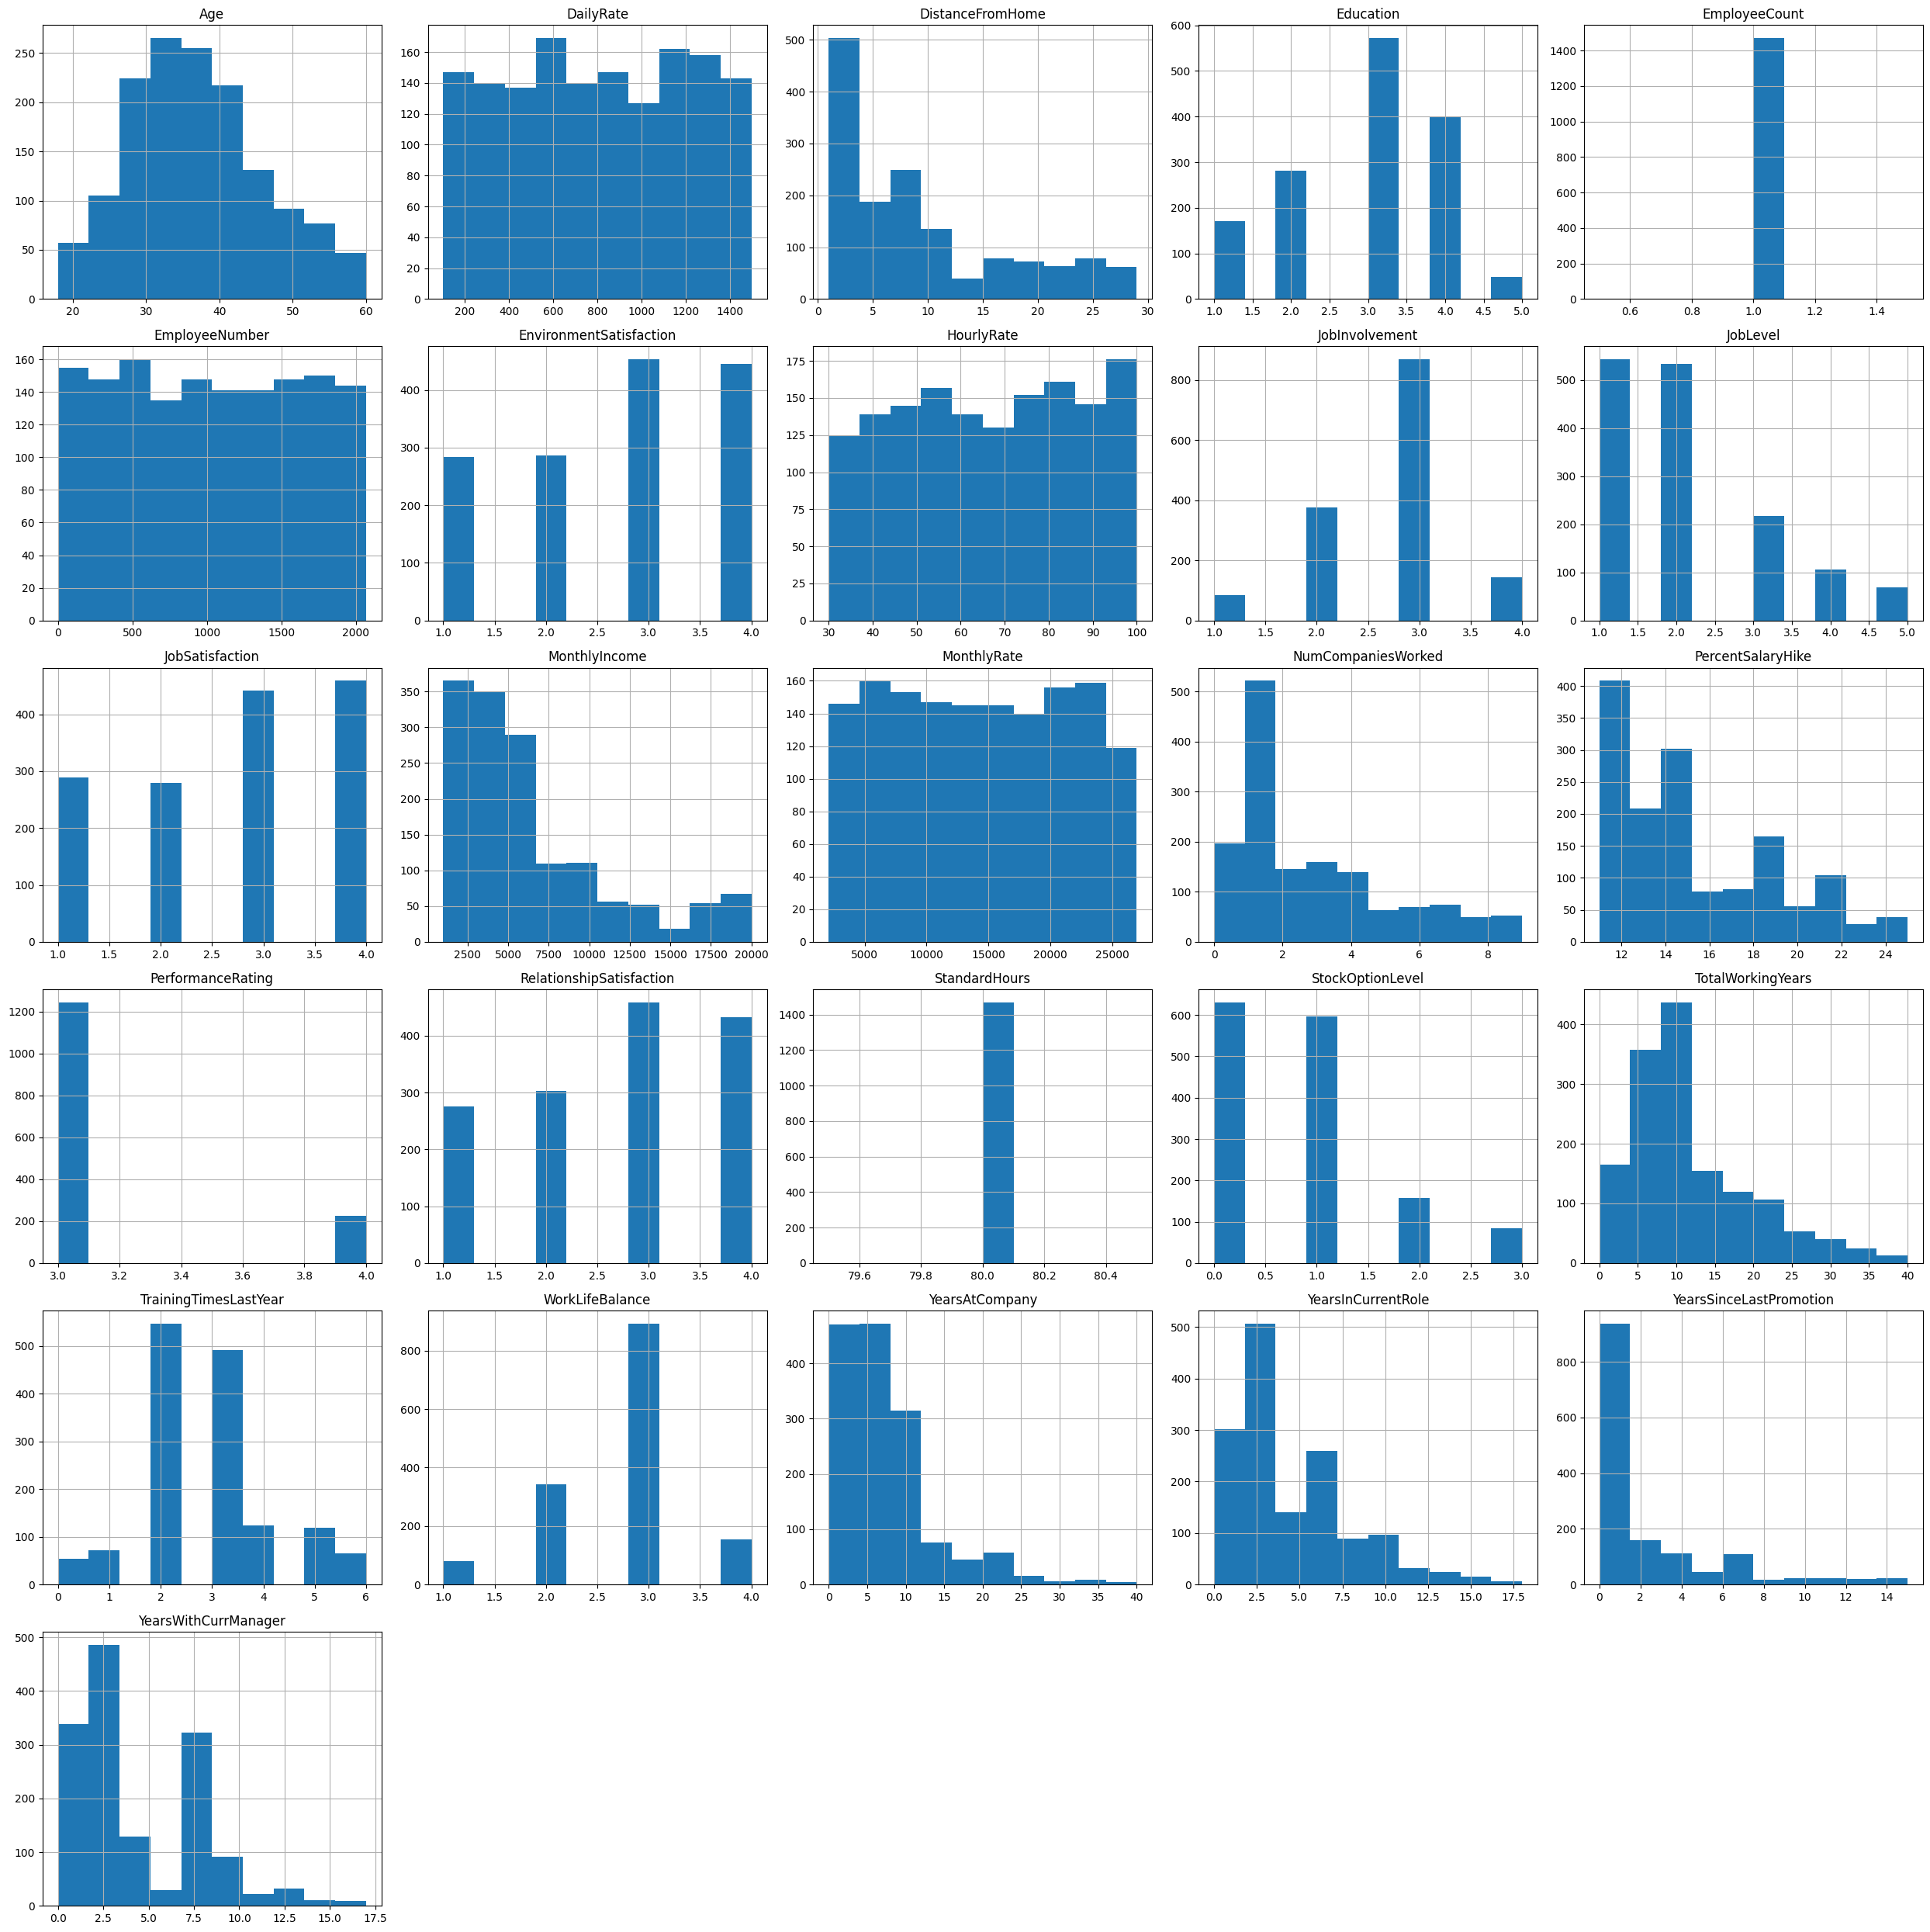

In [ ]:
#The 'Attribution' feature will be our dependent feature, and the rest of the features are independents.
#Visualize the histograms:
employee_attribute_data.hist(figsize=(25,25))
plt.tight_layout()
plt.show()

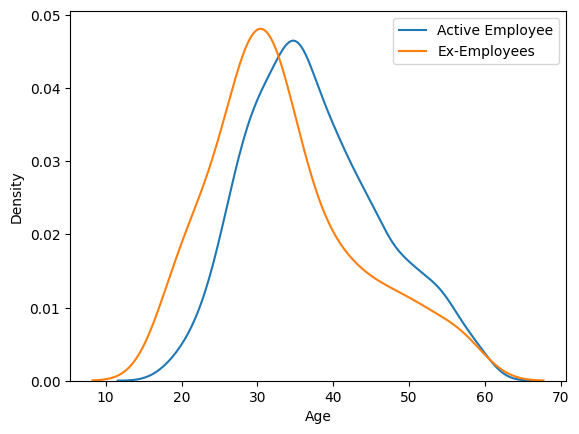

In [ ]:
#Explore the age distribution for ex-employees vs present employees:

sns.kdeplot(employee_attribute_data.loc[employee_attribute_data['Attrition']=='No','Age'],label='Active Employee')

sns.kdeplot(employee_attribute_data.loc[employee_attribute_data['Attrition']=='Yes','Age'],label='Ex-Employees')

plt.legend()
plt.show()

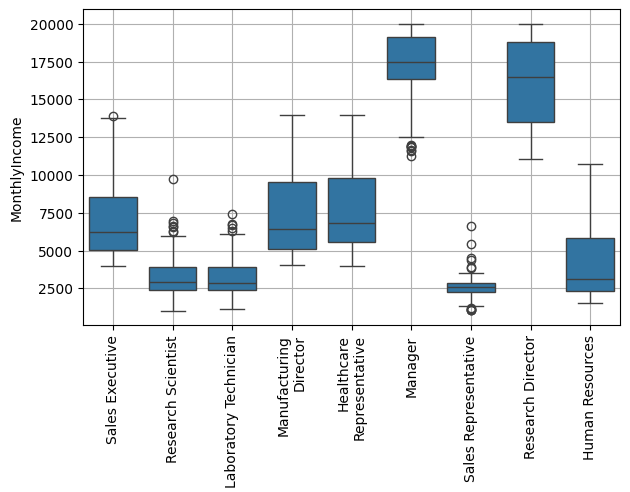

In [ ]:
#"salary" plays a vital role in "attrition"
sns.boxplot(y=employee_attribute_data["MonthlyIncome"],x=employee_attribute_data["JobRole"])
plt.grid(True,alpha=1)
plt.xticks(rotation=90, va='center', ha='right', wrap=True)
plt.tight_layout()
plt.show()

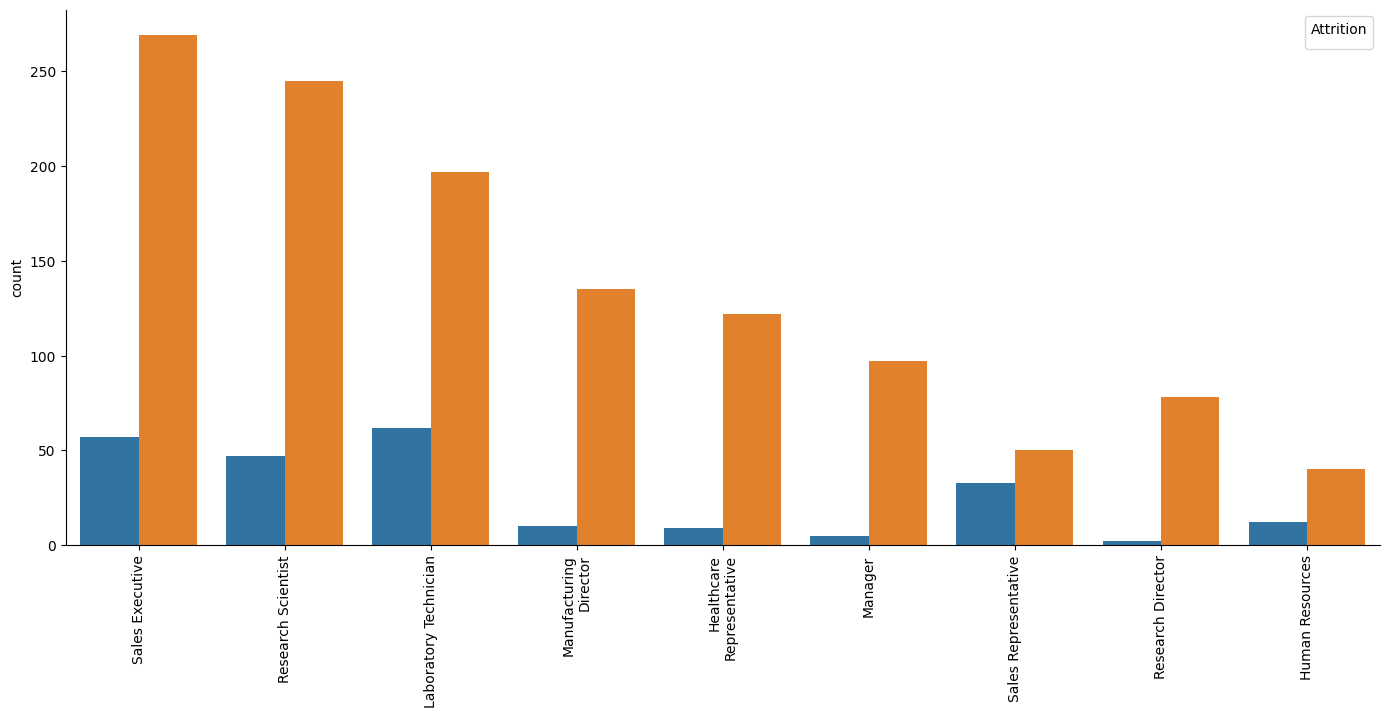

In [ ]:
#The attribution different departments:
sns.catplot(x='JobRole',hue='Attrition', data=employee_attribute_data,kind="count",height=7,aspect=2,legend=False)
plt.xticks(rotation=90, va='center', ha='right', wrap=True)
plt.legend(loc='upper right',title='Attrition')
plt.tight_layout()
plt.show()

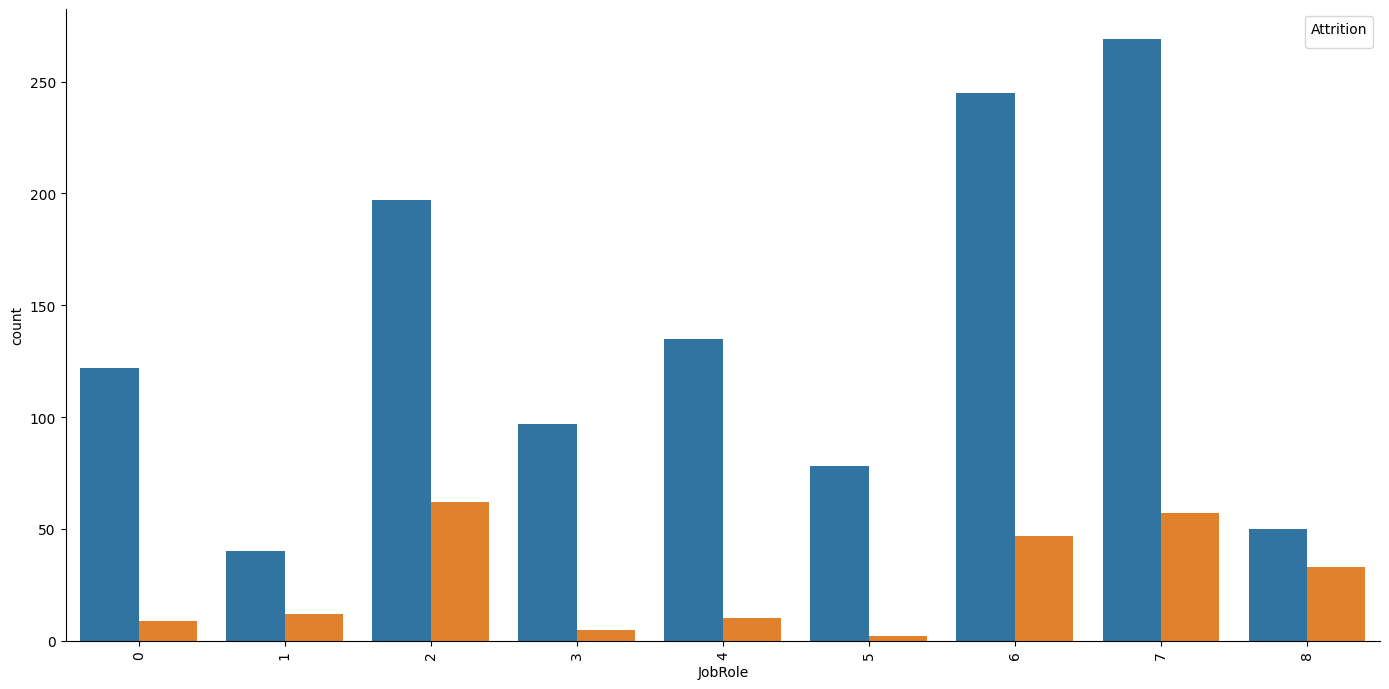

In [ ]:
#Check the attrition among different departments:
sns.catplot(x='JobRole',hue='Attrition', data=employee_attribute_data, kind="count",height=7, aspect=2, legend=False)
plt.xticks(rotation=90, va='center', ha='right', wrap=True)
plt.legend(loc='upper right', title='Attrition')
plt.tight_layout()
plt.show()


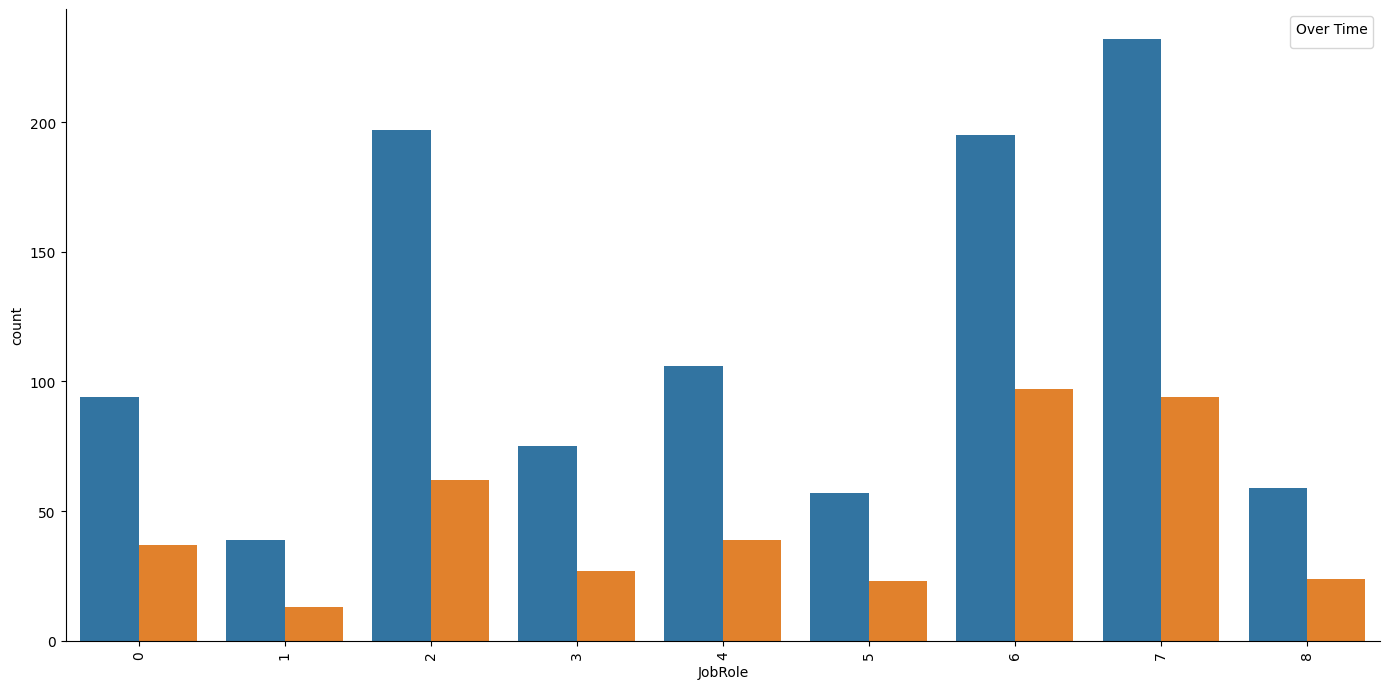

In [ ]:
#Let's see which department is highly involved in the Overtime
# Create the plot
g = sns.catplot(x='JobRole', hue='OverTime', data=employee_attribute_data, kind="count", height=7, aspect=2, legend=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, va='center', ha='right', wrap=True)

# Manually create the legend
handles, labels = g.ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, loc='upper right', title='Over Time')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

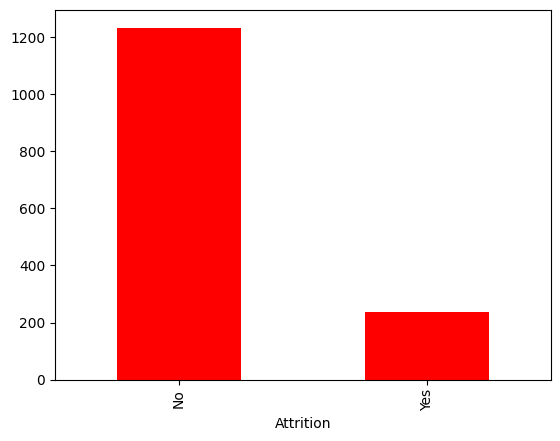

In [ ]:
#Check the overall attritions vs. current employee count:
employee_attribute_data['Attrition'].value_counts().plot(kind="bar",color="#ff0000")
plt.show()

In [ ]:
#Some data type transformation:
employee_attribute_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
#Convert their Datatypes:
for col in employee_attribute_data.columns:
    if employee_attribute_data[col].dtype == 'object':
        employee_attribute_data[col] = employee_attribute_data[col].astype('category')
        employee_attribute_data[col] = employee_attribute_data[col].cat.codes

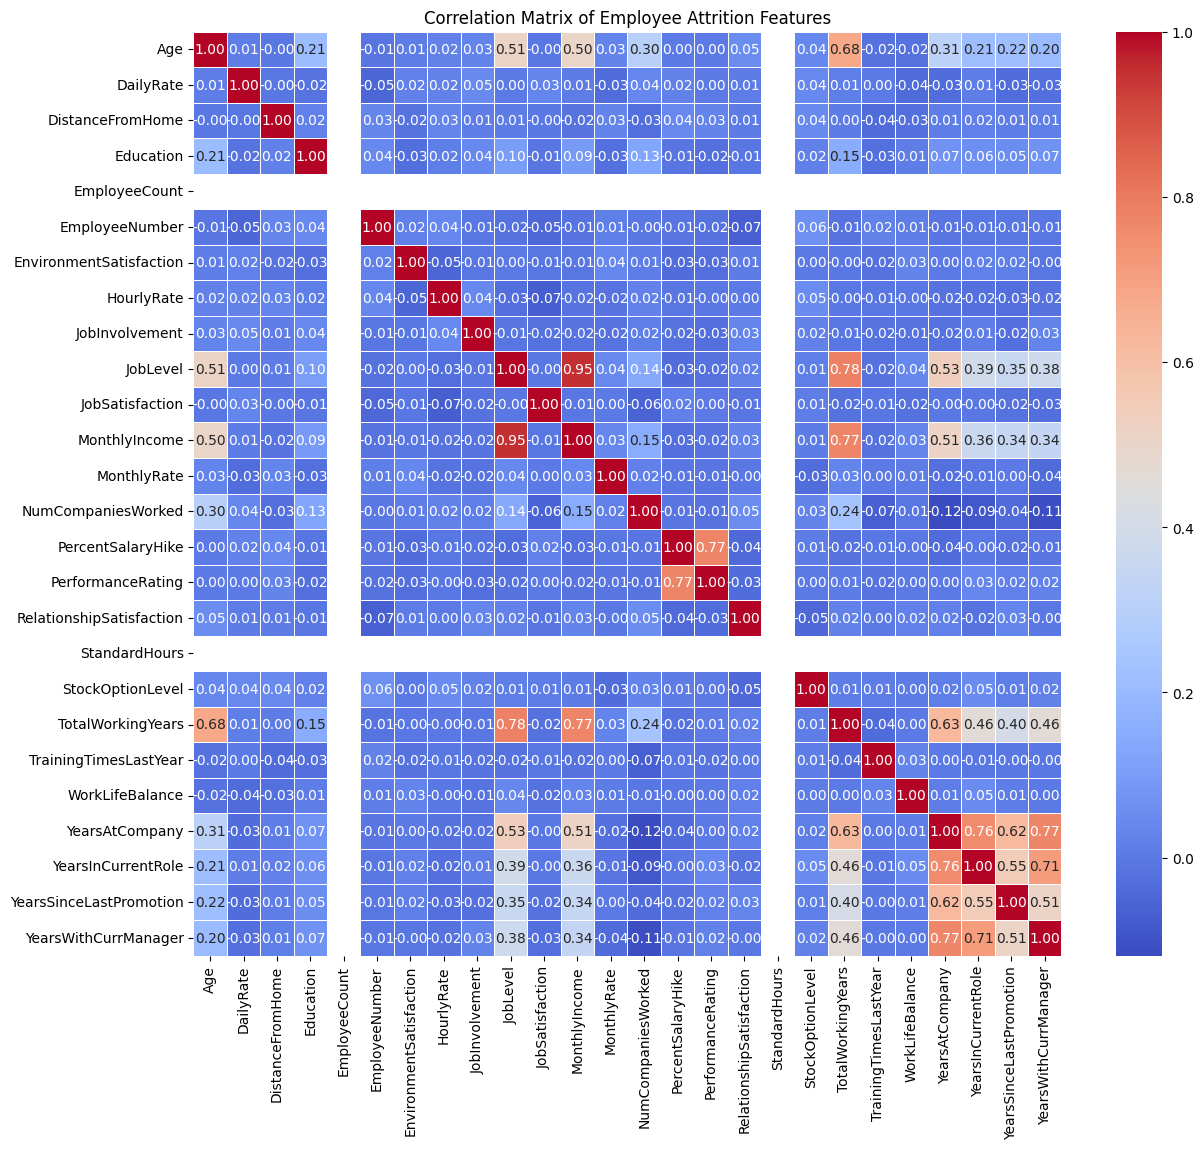

In [ ]:
#Coorelation between these features:
# Select numerical features for correlation analysis
# Drop non-numerical columns if necessary
numerical_features = employee_attribute_data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Employee Attrition Features')
plt.show()